<a href="https://colab.research.google.com/github/Alex-oki/cinema/blob/main/demo/cinema.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание

Перед нами [набор данных](https://dano.hse.ru/data2022), предоставленых компанией Тинькофф для Национальной олимпиады по анализу данных 2022-2023. Вот что пишет организотар:

"Вам представлен датасет реальных заказов в Тинькофф Афиша (небольшой сэмпл
по пользователям). Каждая строка — это один заказ, сделанный в какой-то день
(creation_date) на какой-то день (session_date)".

Для набора имеется [описание](https://dano.hse.ru/mirror/pubs/share/796520523) с расшифровкой полей датасета.

В датасете данные за 2020 год с 1 января по 22 ноября (326 дней).

# Загрузка данных



In [ ]:
# Загрузим данные из google drive c помощью команды ! gdown --id
# https://drive.google.com/file/d/1uHOi6pwOObUwSS2l33H397clntBkIHuw/view?usp=drive_link
# https://dano.hse.ru/data2022


! gdown --id 1uHOi6pwOObUwSS2l33H397clntBkIHuw

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1uHOi6pwOObUwSS2l33H397clntBkIHuw
From (redirected): https://drive.google.com/uc?id=1uHOi6pwOObUwSS2l33H397clntBkIHuw&confirm=t&uuid=ab771ceb-aa9a-48c2-865d-94840354922e
To: /content/cinema_successful_orders.csv
100% 224M/224M [00:01<00:00, 139MB/s]


# Чтение данных

In [ ]:
# Импортируем необходимые библиотеки и произведём необходимые настройки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # загузим библиотеку и установим темную тему для гисторграм
plt.style.use('dark_background')

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

# для полноценной работы со строками мы уберем ограничение строк и столбцов в отображении
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [ ]:
# Прочитаем и оформим наш датасет
df = pd.read_csv('/content/cinema_successful_orders.csv', sep=';')

In [ ]:
# Сложим первое впечатление о данных
df.sample(5)

,order_id,creation_date,session_date,movie_id,movie_name,movie_duration,movie_age_restriction,movie_rating,genre_is_triller,genre_is_military,genre_is_action,genre_is_biographical,genre_is_fairy_tale,genre_is_science,genre_is_fantasy,genre_is_historical,genre_is_drama,genre_is_animation,genre_is_cartoon,genre_is_documentary,genre_is_adventure,genre_is_fiction,genre_is_childish,genre_is_horror,genre_is_humor,genre_is_western,genre_is_noir,genre_is_detective,genre_is_biography,genre_is_criminal,genre_is_tragicomedy,genre_is_biopic,genre_is_mystic,genre_is_family,genre_is_comedy,genre_is_arthouse,number_of_tickets,places,sales_in_cu,ticket_price_in_cu,cinema_name,cinema_address,cinema_latitude,cinema_longitude,cinema_city,client_id
109489,2190061,2020-02-06,2020-02-06,35492,Хищные птицы: Потрясающая история Харли Квинн,116 мин.,18+,"0,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0",2,"ряд 14, место 13, ряд 14, место 14","91,77215189873418","45,88607594936709",Синема Парк Центр Галереи Чижова,"Кольцовская, 35, «Галерея Чижова»",51.665937,39.191617,Воронеж,15913225475879164390
231966,1957150,2020-01-02,2020-01-03,30595,Союз спасения,143,12+,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",2,"ряд 4, место 14, ряд 4, место 15","91,77215189873418","45,88607594936709",Синема Парк Мармелад,"Пошехонское ш., 22, ТРЦ «Мармелад»",59.197043,39.859339,Вологда,10127235872647930093
386522,2096620,2020-01-23,2020-01-23,32749,Плохие парни навсегда,131 мин.,18+,"0,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","1,0","0,0",2,"ряд 7, место 2, ряд 7, место 1","117,0886075949367","58,54430379746835",Формула Кино Аура,"Военная, 5, ТРЦ «Аура»",55.028749,82.936644,Новосибирск,12797241957371607288
260004,2469720,2020-03-10,2020-03-10,38641,Отель Белград,116 мин.,12+,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",2,"ряд 10, место 22, ряд 10, место 21","72,78481012658227","36,392405063291136",Cinema 5 Волгоград,"б-р 30-летия Победы, 21, ТРК Park House",48.749171,44.496691,Волгоград,16433314954864397806
477373,2596094,2020-09-12,2020-09-13,50446,Довод,153,16+,"0,0","1,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",3,"ряд 9, место 6, ряд 9, место 8, ряд 9, место 9","289,55696202531647","96,51898734177215",Формула Кино на Кутузовском,"Кутузовский просп., 57, ТРЦ «Океания»",55.727898,37.476449,Москва,3655174183988953231


In [ ]:
# Взглянем на наименование полей
df.columns
# Наименования адекватны и не требуют ренейминга

Index(['order_id', 'creation_date', 'session_date', 'movie_id', 'movie_name',
       'movie_duration', 'movie_age_restriction', 'movie_rating',
       'genre_is_triller', 'genre_is_military', 'genre_is_action',
       'genre_is_biographical', 'genre_is_fairy_tale', 'genre_is_science',
       'genre_is_fantasy', 'genre_is_historical', 'genre_is_drama',
       'genre_is_animation', 'genre_is_cartoon', 'genre_is_documentary',
       'genre_is_adventure', 'genre_is_fiction', 'genre_is_childish',
       'genre_is_horror', 'genre_is_humor', 'genre_is_western',
       'genre_is_noir', 'genre_is_detective', 'genre_is_biography',
       'genre_is_criminal', 'genre_is_tragicomedy', 'genre_is_biopic',
       'genre_is_mystic', 'genre_is_family', 'genre_is_comedy',
       'genre_is_arthouse', 'number_of_tickets', 'places', 'sales_in_cu',
       'ticket_price_in_cu', 'cinema_name', 'cinema_address',
       'cinema_latitude', 'cinema_longitude', 'cinema_city', 'client_id'],
      dtype='object')

In [ ]:
# Взглянем на информацию о датасете
df.info()
# df.shape
# Перед нами достаточно большой датасет размерностью в 46 полей и мощностью в 525271 записей.
# Заметим, что:
# атрибут 'sales_in_cu' и 'ticket_price_in_cu' имеют тип object, но являются насителями цены. Нам предстоит преобразовать их в float64.
# 'movie_duration' имеет тип object, в нем не только цыфры, но и текст!(это сказано в описании)
# 'movie_rating' имеет тип object, небходимо уточнить содержимое и возможно переделать тип в float64
# все жанры имеют булевы значения, но записаны как 1,0. возможно нужно создать предсказуемое отображение
# количество значений в столбцах различается, значит есть пробелы
# 'creation_date' и	'session_date' имеют тип данных object, нам предстоит преобразовать этот тип

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525271 entries, 0 to 525270
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               525271 non-null  int64  
 1   creation_date          525271 non-null  object 
 2   session_date           525271 non-null  object 
 3   movie_id               525271 non-null  int64  
 4   movie_name             525271 non-null  object 
 5   movie_duration         521989 non-null  object 
 6   movie_age_restriction  523648 non-null  object 
 7   movie_rating           525271 non-null  object 
 8   genre_is_triller       525188 non-null  object 
 9   genre_is_military      525188 non-null  object 
 10  genre_is_action        525188 non-null  object 
 11  genre_is_biographical  525188 non-null  object 
 12  genre_is_fairy_tale    525188 non-null  object 
 13  genre_is_science       525188 non-null  object 
 14  genre_is_fantasy       525188 non-nu

In [ ]:
# взглянем на описание количественных элементов
df.describe()
# видим, что данные распределены достаточно ровно

,order_id,movie_id,number_of_tickets,cinema_latitude,cinema_longitude,client_id
count,5.252710e+05,525271.000000,525271.000000,525271.000000,525271.000000,5.252710e+05
mean,2.322286e+06,36903.147092,2.108993,55.326354,44.749211,9.226368e+18
std,2.275340e+05,7458.369197,0.826882,3.577145,18.415928,5.336345e+18
min,1.937816e+06,7.000000,1.000000,42.773516,20.155715,1.095410e+14
25%,2.125754e+06,32452.000000,2.000000,55.039200,37.476449,4.603979e+18
50%,2.319667e+06,35305.000000,2.000000,55.753966,37.675100,9.224153e+18
75%,2.510936e+06,39063.000000,2.000000,56.317942,47.266012,1.385790e+19
max,2.725041e+06,59786.000000,6.000000,69.066955,158.587354,1.844673e+19


In [ ]:
# проверим датасет на количество пропусков
df.isnull().sum().sort_values(ascending=False)

movie_duration           3282
movie_age_restriction    1623
genre_is_horror            83
genre_is_biography         83
genre_is_fiction           83
genre_is_childish          83
genre_is_humor             83
genre_is_western           83
genre_is_noir              83
genre_is_detective         83
genre_is_tragicomedy       83
genre_is_criminal          83
genre_is_documentary       83
genre_is_biopic            83
genre_is_mystic            83
genre_is_family            83
genre_is_comedy            83
genre_is_arthouse          83
genre_is_adventure         83
genre_is_cartoon           83
genre_is_biographical      83
genre_is_drama             83
genre_is_historical        83
genre_is_fantasy           83
genre_is_science           83
genre_is_fairy_tale        83
genre_is_animation         83
genre_is_action            83
genre_is_military          83
genre_is_triller           83
cinema_latitude             0
cinema_city                 0
cinema_longitude            0
sales_in_c

In [ ]:
# Посмотрим на пропуски в процентах(долях)
df.isna().mean().sort_values(ascending=False)
# У нас есть проопуски во всех жанрах(причем, значения одинаковые - 83, вероятно это одни и те же записи), а так же в movie_duration (3282 записи)
# и movie_age_restriction (1623 записи)
# большинство пропусков в movie_duration и movie_age_restriction, но и в этих случаях количество измеряется в тысячных долях процента,
# а значит не повлияет на результат нашей работы
# Для дальнейшей работы на этом этапе мы оставим всё как есть и не станем удалять или видоизменять записи с пропущенными значениями
# атрибут 'sales_in_cu' и 'ticket_price_in_cu' не имеют пропусковть записи с пропущенными значениями

movie_duration           0.006248
movie_age_restriction    0.003090
genre_is_horror          0.000158
genre_is_biography       0.000158
genre_is_fiction         0.000158
genre_is_childish        0.000158
genre_is_humor           0.000158
genre_is_western         0.000158
genre_is_noir            0.000158
genre_is_detective       0.000158
genre_is_tragicomedy     0.000158
genre_is_criminal        0.000158
genre_is_documentary     0.000158
genre_is_biopic          0.000158
genre_is_mystic          0.000158
genre_is_family          0.000158
genre_is_comedy          0.000158
genre_is_arthouse        0.000158
genre_is_adventure       0.000158
genre_is_cartoon         0.000158
genre_is_biographical    0.000158
genre_is_drama           0.000158
genre_is_historical      0.000158
genre_is_fantasy         0.000158
genre_is_science         0.000158
genre_is_fairy_tale      0.000158
genre_is_animation       0.000158
genre_is_action          0.000158
genre_is_military        0.000158
genre_is_trill

In [ ]:
# проверим наш датафрейм на отрицательные значения
col=df.select_dtypes(include=['float64','int64']).columns
lt=list()
for i in col:
    y=any(x < 0 for x in df[i])
    if y==True:
        lt.append(y)
print('В датасете {} отрицательных значений'.format(len(lt)))

# у нас  таких значений нет

В датасете 0 отрицательных значений


In [ ]:
# проверим количество дубликатов
df.duplicated().sum()
# дубликатов так же не имеется

0

# Преобразование данных

In [ ]:
# Удалим поле 'client_id'. Оно не несёт для нас пользы для анализа
df = df[['order_id', 'creation_date', 'session_date', 'movie_id', 'movie_name',
       'movie_duration', 'movie_age_restriction', 'movie_rating',
       'genre_is_triller', 'genre_is_military', 'genre_is_action',
       'genre_is_biographical', 'genre_is_fairy_tale', 'genre_is_science',
       'genre_is_fantasy', 'genre_is_historical', 'genre_is_drama',
       'genre_is_animation', 'genre_is_cartoon', 'genre_is_documentary',
       'genre_is_adventure', 'genre_is_fiction', 'genre_is_childish',
       'genre_is_horror', 'genre_is_humor', 'genre_is_western',
       'genre_is_noir', 'genre_is_detective', 'genre_is_biography',
       'genre_is_criminal', 'genre_is_tragicomedy', 'genre_is_biopic',
       'genre_is_mystic', 'genre_is_family', 'genre_is_comedy',
       'genre_is_arthouse', 'number_of_tickets', 'places', 'sales_in_cu',
       'ticket_price_in_cu', 'cinema_name', 'cinema_address',
       'cinema_latitude', 'cinema_longitude', 'cinema_city']]
# df = df.drop('client_id', axis = 1)

In [ ]:
df.sample(5)

,order_id,creation_date,session_date,movie_id,movie_name,movie_duration,movie_age_restriction,movie_rating,genre_is_triller,genre_is_military,genre_is_action,genre_is_biographical,genre_is_fairy_tale,genre_is_science,genre_is_fantasy,genre_is_historical,genre_is_drama,genre_is_animation,genre_is_cartoon,genre_is_documentary,genre_is_adventure,genre_is_fiction,genre_is_childish,genre_is_horror,genre_is_humor,genre_is_western,genre_is_noir,genre_is_detective,genre_is_biography,genre_is_criminal,genre_is_tragicomedy,genre_is_biopic,genre_is_mystic,genre_is_family,genre_is_comedy,genre_is_arthouse,number_of_tickets,places,sales_in_cu,ticket_price_in_cu,cinema_name,cinema_address,cinema_latitude,cinema_longitude,cinema_city
9868,2233350,2020-02-12,2020-02-12,35901,Кома,121 мин.,16+,"0,0","1,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",2,"ряд 7, место 10, ряд 7, место 9","63,29113924050633","31,645569620253166",Синема Парк Космос,"Доваторцев, 75а, ТРЦ «Космос»",44.997445,41.923090,Ставрополь
176008,2378331,2020-02-26,2020-02-26,38542,Западня для дьявола,94 мин.,16+,"0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",2,"ряд 8, место 5, ряд 8, место 6","47,46835443037975","23,734177215189874",Киномакс–Астрахань,"пл. Вокзальная, 13, ТРЦ «Ярмарка»",46.359671,48.055449,Астрахань
94681,2410111,2020-03-01,2020-03-01,36648,Просто помиловать,144 мин.,18+,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",2,"ряд 6, место 4, ряд 6, место 3","85,44303797468355","42,721518987341774",Гриннфильм,"просп. Богдана Хмельницкого, 137т, ТРЦ «Мега-г...",50.632863,36.571097,Белгород
82756,2507674,2020-03-21,2020-03-21,37643,Моя собака Идиот,106,16+,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0",2,"ряд 9, место 10, ряд 9, место 9","94,9367088607595","47,46835443037975",5 звезд на Новокузнецкой,"Б.Овчинниковский пер., 16, ТЦ «Аркадия»",55.744567,37.629927,Москва
491779,2344514,2020-02-23,2020-02-23,36247,Джентльмены,113,18+,"0,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0",2,"ряд 4, место 6, ряд 4, место 5","113,92405063291139","56,962025316455694",Киномакс–Релакс (Пушкино),"Красноармейское ш., влад. 105, ТРЦ «Пушкино-парк»",56.017492,37.885419,Пушкино


In [ ]:
# Произведем преобразование типа для полей 'sales_in_cu' и 'ticket_price_in_cu' на float
# для чего сначала заменим запятые на точки в этих столбцах
df['sales_in_cu'] = df['sales_in_cu'].str.replace(',', '.')
df['ticket_price_in_cu'] = df['ticket_price_in_cu'].str.replace(',', '.')

df['sales_in_cu'] = df['sales_in_cu'].astype (float)
df['ticket_price_in_cu'] = df['ticket_price_in_cu'].astype (float)

In [ ]:
len(df)

525271

In [ ]:
# удалим все строки с путыми значениями
# df.dropna(inplace=True)
# df.dropna (subset=['assists'], inplace=True) # это для конкретного столбца

In [ ]:
# Произведем преобразование типа 'movie_rating' на float

df['movie_rating'] = df['movie_rating'].str.replace(',', '.')
df['movie_rating'] = df['movie_rating'].astype (float)

In [ ]:
# оставим только возраст в 'movie_age_restriction'

df['movie_age_restriction'] = df['movie_age_restriction'].str.replace(r'[^\d\.]', '', regex=True)

In [ ]:
# NaN      1623 - не указан возраст
df['movie_age_restriction'].value_counts(dropna = False)

movie_age_restriction
18     159213
16     148983
12     130441
6       83652
NaN      1623
0        1359
Name: count, dtype: int64

In [ ]:
# оставим только цыфры для поля 'movie_duration'

df['movie_duration'] = df['movie_duration'].str.replace(r'[^\d\.]', '', regex=True)

In [ ]:
# NaN      3282 - не указан возраст
df['movie_duration'].value_counts(dropna = False)

movie_duration
113     78916
153     30747
150     27893
120     25983
109     21567
131.    15014
116.    13511
100     13286
124.    12860
137.    12470
101     12016
132     11860
135     11729
119      9726
125      9053
123      8439
105      8273
104.     8164
110      8142
115      7518
103      6618
140.     6133
108.     5615
104      5608
95       5382
130      5374
143      5055
133      4936
101.     4902
134      4700
106      4480
119.     4480
92.      4377
94       4367
92       4163
124      4069
109.     3956
172.     3511
100.     3490
102      3434
NaN      3282
138.     3055
118      3044
142      3000
93.      2876
115.     2874
131      2624
88       2550
122      2471
111      2435
121.     2022
96       2015
116      1982
110.     1967
99       1914
86       1884
117      1843
94.      1736
91.      1710
84       1659
90       1615
107.     1553
89       1553
91       1385
105.     1368
97       1318
87       1164
118.     1128
111.     1041
80.      1030
106. 

In [ ]:
df['movie_rating'].value_counts(dropna = False)

movie_rating
0.00     284222
8.15      34061
7.50      33592
6.70      17482
6.00      14242
5.75      10828
6.90      10822
8.10      10157
6.65       8987
6.50       7903
6.40       6922
7.70       5335
6.15       4847
5.90       4678
5.00       4667
5.25       4574
6.95       4447
6.75       4282
6.25       3496
7.90       3461
6.35       3411
7.05       3334
5.10       3281
6.85       2719
7.60       2586
6.55       2584
5.65       2519
7.45       2307
5.50       2000
7.30       1375
5.35       1090
8.25        982
7.40        930
6.05        888
4.45        776
6.45        759
7.95        715
8.20        715
5.05        683
5.45        683
7.00        666
4.70        664
5.40        595
7.20        565
6.30        560
8.70        532
6.60        489
5.60        481
4.10        478
4.85        424
5.55        414
5.70        362
8.05        357
7.35        353
5.20        344
5.30        336
4.80        321
7.25        302
4.20        288
8.85        224
8.30        214
7.85       

In [ ]:
# оставим только цыфры в 'places'
# df['places_1'] = df['places'].str.replace(r'[^\d\.]', '', regex=True)

In [ ]:
# Изменим тип даты на datetime64 для 'creation_date' и 'session_date'
df['creation_date'] = df['creation_date'].astype ("datetime64[ns]")
df['session_date'] = df['session_date'].astype ("datetime64[ns]")

In [ ]:
# Взглянем на целевые количественные переменные 'sales_in_cu','ticket_price_in_cu'
df[['sales_in_cu','ticket_price_in_cu']].describe()
# средняя стоимость билета - 47 уе, минимимальная - 2, 75 процентов имеет стоимость 56 уе и ниже
# максимальнаая - 1528. возможно выбросы. Нужно проверить

,sales_in_cu,ticket_price_in_cu
count,525271.000000,525271.000000
mean,100.070838,47.561120
std,60.813886,22.020430
min,7.120253,2.373418
25%,58.544304,31.645570
50%,88.607595,44.303797
75%,123.417722,56.962025
max,2848.101266,1582.278481


<Axes: >

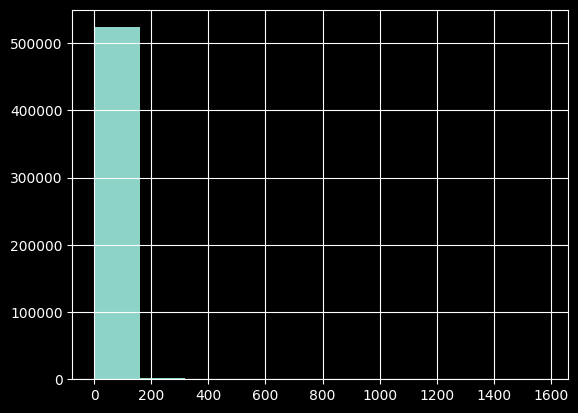

In [ ]:
# посмотрим на гистограмму
df['ticket_price_in_cu'].hist()
# видим "жирный хвост"

In [ ]:
# посмотрим как ведёт себя этот хвост
t = df[df['ticket_price_in_cu'] > 200.0]

In [ ]:
t['ticket_price_in_cu'].value_counts()
# видим что цена 1582.278481 - только для одного билета. скорее всего это выброс

ticket_price_in_cu
237.341772     219
205.696203     168
221.518987     158
268.987342      41
395.569620      27
223.101266      24
316.455696      19
210.427215      13
245.253165      12
207.278481      11
405.063291      10
213.607595      10
226.613924       9
300.632911       8
246.835443       8
253.164557       6
427.215190       6
712.025316       6
219.936709       4
284.810127       4
325.949367       4
553.797468       3
400.316456       3
261.075949       3
332.278481       2
323.734177       2
275.174051       2
212.025316       2
254.746835       2
227.848101       1
214.473892       1
474.683544       1
403.481013       1
242.800633       1
1582.278481      1
Name: count, dtype: int64

In [ ]:
# посомтрим на этот билет. Кутузовский просп, 48 - парк победы, цены в этом кинотеатре действительно на порядок выше
# считаем это выбросом и удаляем
t = df[df['ticket_price_in_cu'] > 1500.0]

In [ ]:
df = df[df['ticket_price_in_cu'] < 1500]

In [ ]:
# удаление прошло ууспешно
df.shape

(525270, 45)

In [ ]:
df.describe()
# теперь самый доррогой - 712 руб - и тоже на Кутузовский просп, 48, таких билетов 6 штук, мы их оставляем

,order_id,creation_date,session_date,movie_id,movie_rating,number_of_tickets,sales_in_cu,ticket_price_in_cu,cinema_latitude,cinema_longitude
count,5.252700e+05,525270,525270,525270.000000,525270.000000,525270.000000,525270.000000,525270.000000,525270.000000,525270.000000
mean,2.322286e+06,2020-04-03 18:28:08.539608320,2020-04-04 04:45:58.937688832,36903.148341,3.166606,2.108995,100.068016,47.558198,55.326353,44.749225
min,1.937816e+06,2020-01-01 00:00:00,2020-01-01 00:00:00,7.000000,0.000000,1.000000,7.120253,2.373418,42.773516,20.155715
25%,2.125753e+06,2020-01-27 00:00:00,2020-01-28 00:00:00,32452.000000,0.000000,2.000000,58.544304,31.645570,55.039200,37.476449
50%,2.319668e+06,2020-02-21 00:00:00,2020-02-21 00:00:00,35305.000000,0.000000,2.000000,88.607595,44.303797,55.753966,37.675100
75%,2.510937e+06,2020-03-23 00:00:00,2020-03-24 00:00:00,39063.000000,6.700000,2.000000,123.417722,56.962025,56.317942,47.266012
max,2.725041e+06,2020-10-30 00:00:00,2020-11-22 00:00:00,59786.000000,83.000000,6.000000,2848.101266,712.025316,69.066955,158.587354
std,2.275343e+05,NaN,NaN,7458.376242,3.565150,0.826882,60.779547,21.918397,3.577149,18.415942


In [ ]:
# А так же имеются и подозрительно дешевые билеты
# Оставляем и их, их достаточное количество, но есть один со стоимостью меньше 3 уе. считаем его выбросом и удалим
df[df['ticket_price_in_cu'] < 3]

,order_id,creation_date,session_date,movie_id,movie_name,movie_duration,movie_age_restriction,movie_rating,genre_is_triller,genre_is_military,genre_is_action,genre_is_biographical,genre_is_fairy_tale,genre_is_science,genre_is_fantasy,genre_is_historical,genre_is_drama,genre_is_animation,genre_is_cartoon,genre_is_documentary,genre_is_adventure,genre_is_fiction,genre_is_childish,genre_is_horror,genre_is_humor,genre_is_western,genre_is_noir,genre_is_detective,genre_is_biography,genre_is_criminal,genre_is_tragicomedy,genre_is_biopic,genre_is_mystic,genre_is_family,genre_is_comedy,genre_is_arthouse,number_of_tickets,places,sales_in_cu,ticket_price_in_cu,cinema_name,cinema_address,cinema_latitude,cinema_longitude,cinema_city
135575,2691654,2020-10-16,2020-10-18,47175,Ловец снов,85,18,3.9,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",3,"ряд 6, место 14, ряд 6, место 13, ряд 6, место 12",7.120253,2.373418,Киноконцертный зал Маяк,"ул. Армейская, д. 1",54.95338,20.226521,Пионерский


In [ ]:
df = df[df['ticket_price_in_cu'] > 3]

In [ ]:
len(df)

525269

In [ ]:
df.describe()

,order_id,creation_date,session_date,movie_id,movie_rating,number_of_tickets,sales_in_cu,ticket_price_in_cu,cinema_latitude,cinema_longitude
count,5.252690e+05,525269,525269,525269.000000,525269.000000,525269.000000,525269.000000,525269.000000,525269.000000,525269.000000
mean,2.322286e+06,2020-04-03 18:27:36.426706944,2020-04-04 04:45:26.566387712,36903.128785,3.166605,2.108994,100.068193,47.558284,55.326353,44.749272
min,1.937816e+06,2020-01-01 00:00:00,2020-01-01 00:00:00,7.000000,0.000000,1.000000,7.753165,7.383966,42.773516,20.155715
25%,2.125752e+06,2020-01-27 00:00:00,2020-01-28 00:00:00,32452.000000,0.000000,2.000000,58.544304,31.645570,55.039200,37.476449
50%,2.319667e+06,2020-02-21 00:00:00,2020-02-21 00:00:00,35305.000000,0.000000,2.000000,88.607595,44.303797,55.753966,37.675100
75%,2.510936e+06,2020-03-23 00:00:00,2020-03-24 00:00:00,39063.000000,6.700000,2.000000,123.417722,56.962025,56.317942,47.266012
max,2.725041e+06,2020-10-30 00:00:00,2020-11-22 00:00:00,59786.000000,83.000000,6.000000,2848.101266,712.025316,69.066955,158.587354
std,2.275339e+05,NaN,NaN,7458.369875,3.565153,0.826881,60.779469,21.918329,3.577152,18.415929


# Составим впечатление

In [ ]:
# какой период представлен в датасете?
x = df['session_date'].max() - df['session_date'].min()
print('датасет освещает {}'.format(x))

датасет освещает 326 days 00:00:00


In [ ]:
# когда были первый и последний сеансы?
print('Первый сеанс был {}'.format(df['session_date'].min()))
print('Последний сеанс был {}'.format(df['session_date'].max()))

Первый сеанс был 2020-01-01 00:00:00
Последний сеанс был 2020-11-22 00:00:00


In [ ]:
# какое количество фильмов представлено в датасете?
df['movie_name'].nunique()
# df['movie_id'].nunique()
# но id предстаавлены  для 1597
# то есть для некоторых фильмов заведены более одного id
# значит будем использовать 'movie_name'

1193

In [ ]:
# какую выручку получили топ 10 фильмов за 2020 год?
t = df.groupby('movie_name')['sales_in_cu'].sum().sort_values(ascending=False).reset_index().head(10)
t = t.rename({'sales_in_cu':'Выручка', 'movie_name':'Фильм'},axis=1)
t

,Фильм,Выручка
0,Джентльмены,8.170719e+06
1,Довод,6.232336e+06
2,Холоп,4.293313e+06
3,1917,2.200078e+06
4,Лёд 2,2.154111e+06
5,Плохие парни навсегда,1.924163e+06
6,Хищные птицы: Потрясающая история Харли Квинн,1.542623e+06
7,Вторжение,1.233118e+06
8,Соник в кино,1.085853e+06
9,Маленькие женщины,1.052316e+06


<Axes: >

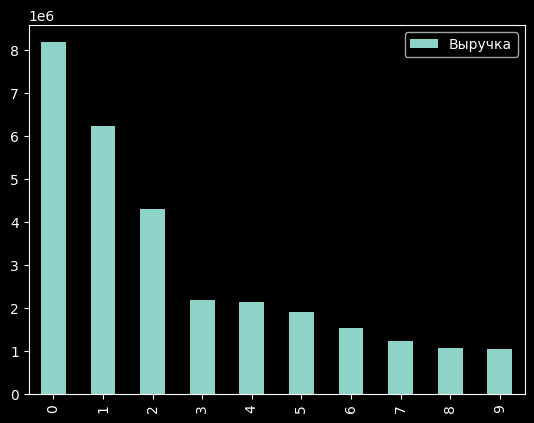

In [ ]:
t.plot(kind='bar')

In [ ]:
# посмотрим на российский прокат
# какой топ самых кассовых российских фильмов в 2020?
list_of_values = ['Холоп','1917', 'Лёд 2', 'Вторжение']
y = t[t['Фильм'].isin(list_of_values)]
y

,Фильм,Выручка
2,Холоп,4.293313e+06
3,1917,2.200078e+06
4,Лёд 2,2.154111e+06
7,Вторжение,1.233118e+06


In [ ]:
# какая выручка у российских фильмов?
y['Выручка'].sum()

9880620.14398734

In [ ]:
# какая выручка у американских фильмов?
t['Выручка'].sum() - y['Выручка'].sum()

20008008.890822783

In [ ]:
# как отличается выручка у российского и американского?
# мериканские картины собрали в 2 раза большую кассу нежели российские
(t['Выручка'].sum() - y['Выручка'].sum()) / y['Выручка'].sum()

2.0249750116138476

In [ ]:
# сколько городов в участвуют в датасете? - 233
df['cinema_city'].nunique()

233

In [ ]:
# а сколько кинотеатров?
df['cinema_name'].nunique()

782

In [ ]:
# топ 10 городов с максимальным количеством показов(заказов). в мск на порядок выше, чем в питере.
df.groupby('cinema_city')['cinema_name'].count().sort_values(ascending=False).head(10)

cinema_city
Москва             189426
Санкт-Петербург     68306
Казань              16720
Екатеринбург        15819
Ростов-на-Дону      11397
Новосибирск         10480
Краснодар            8869
Реутов               7953
Нижний Новгород      7904
Воронеж              7570
Name: cinema_name, dtype: int64

In [ ]:
# сколько кинотеатров в мск?
df[df['cinema_city'] == 'Москва']['cinema_name'].nunique()

143

In [ ]:
# сколько кинотеатров в уфе?
df[df['cinema_city'] == 'Уфа']['cinema_name'].nunique()

10

In [ ]:
# как отличается средняя стоимость билета на фильм Джентльмены в разных городах?
# самая высокая цена в Химках, самая низкая - Новошахтинск
df[df['movie_name'] == 'Джентльмены'].groupby('cinema_city')['ticket_price_in_cu'].mean().sort_values(ascending= False)

cinema_city
Химки                       69.793215
Подольск                    63.927910
Москва                      61.882533
Зеленоград                  60.074315
Петропавловск-Камчатский    59.874856
Геленджик                   59.335443
Клин                        57.539343
Электросталь                57.527950
Воскресенск                 56.893231
Серпухов                    56.610408
Реутов                      56.576583
Луховицы                    56.434599
Сергиев Посад               55.907173
Рославль                    55.379747
Владивосток                 55.248752
Владикавказ                 55.106940
Жуковский                   55.091155
Хабаровск                   54.435016
Братск                      53.797468
Нижневартовск               52.667269
Орехово-Зуево               52.560414
Балашиха                    52.260723
Магадан                     51.720728
Великий Новгород            49.790316
Чита                        49.334249
Сочи                        48.396922


In [ ]:
# как отличается средняя стоимость билета в разных городах?
# самая высокая цена в Химках
df.groupby('cinema_city')['ticket_price_in_cu'].mean().sort_values(ascending= False)

cinema_city
Химки                          67.865841
Москва                         58.151966
Подольск                       57.670381
Петропавловск-Камчатский       55.669188
Руза                           55.495121
Зеленоград                     55.248537
Хабаровск                      55.014843
Братск                         55.005444
Елизово                        54.130580
Реутов                         53.462828
Белоярский                     52.987931
Жуковский                      52.938759
Владивосток                    52.565449
Серпухов                       52.348848
Можайск                        51.728335
Клин                           51.509433
Воскресенск                    51.405660
Электросталь                   51.136752
Балашиха                       50.767196
Котлас                         50.345224
Владикавказ                    49.031384
Адлер                          48.730388
Красногорск                    48.727783
Южно-Сахалинск                 48.084506
Сочи

In [ ]:
# фильмы-лидерры по количеству проданных билетов
t = df.groupby(['movie_name'])['number_of_tickets'].sum().sort_values(ascending=False)

In [ ]:
t.head(10)
# на Джентльмены - 162159 билетов по всей стране
# на Довод - 115946 билетов по всей стране
# Холоп - 92766
# Лёд 2   - 48773
# 1917 - 43243

movie_name
Джентльмены                                      162158
Довод                                            115946
Холоп                                             92766
Лёд 2                                             48773
1917                                              43243
Плохие парни навсегда                             40134
Хищные птицы: Потрясающая история Харли Квинн     31467
Соник в кино                                      26520
Вторжение                                         24835
Маленькие женщины                                 22511
Name: number_of_tickets, dtype: int64

<Axes: xlabel='movie_name'>

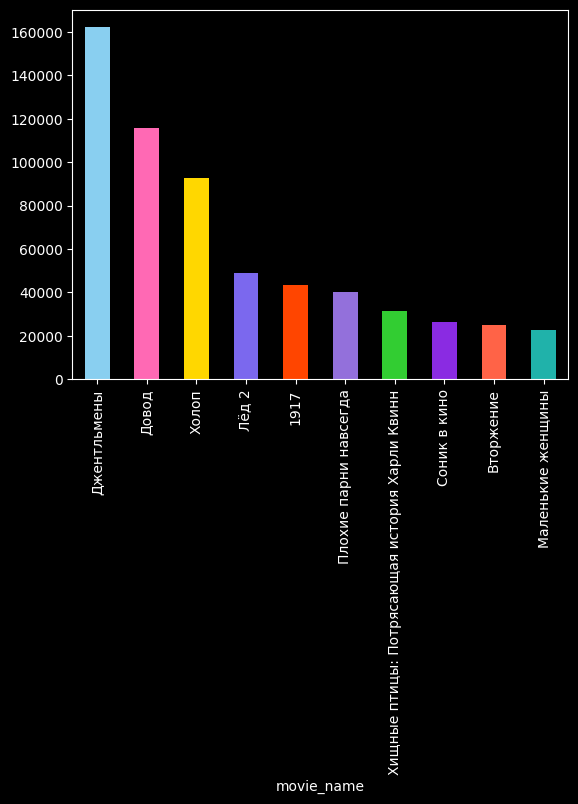

In [ ]:
t.head(10).plot(kind='bar', color = colors, rot = 90)

In [ ]:
# как отличается выручка в разных городах?
# в лидера москва и питер
t = df.groupby('cinema_city')['sales_in_cu'].sum().sort_values(ascending= False).head(10)
t

cinema_city
Москва             2.265634e+07
Санкт-Петербург    6.327309e+06
Екатеринбург       1.247766e+06
Казань             1.247357e+06
Ростов-на-Дону     1.107122e+06
Новосибирск        1.016205e+06
Краснодар          9.314747e+05
Реутов             9.132437e+05
Нижний Новгород    7.326573e+05
Воронеж            6.332899e+05
Name: sales_in_cu, dtype: float64

<Axes: xlabel='cinema_city'>

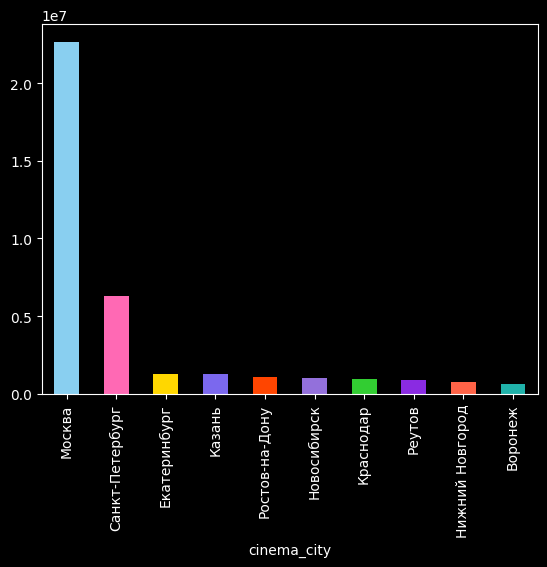

In [ ]:
t.plot(kind='bar', color = colors, rot = 90)

In [ ]:
# какой город продает больше всего билетов?
# в лидера москва и питер
t = df.groupby('cinema_city')['number_of_tickets'].sum().sort_values(ascending= False).head(10)
t

cinema_city
Москва             386464
Санкт-Петербург    138766
Казань              35241
Екатеринбург        33625
Ростов-на-Дону      25172
Новосибирск         22152
Краснодар           19859
Нижний Новгород     17085
Реутов              16932
Воронеж             16221
Name: number_of_tickets, dtype: int64

<Axes: xlabel='cinema_city'>

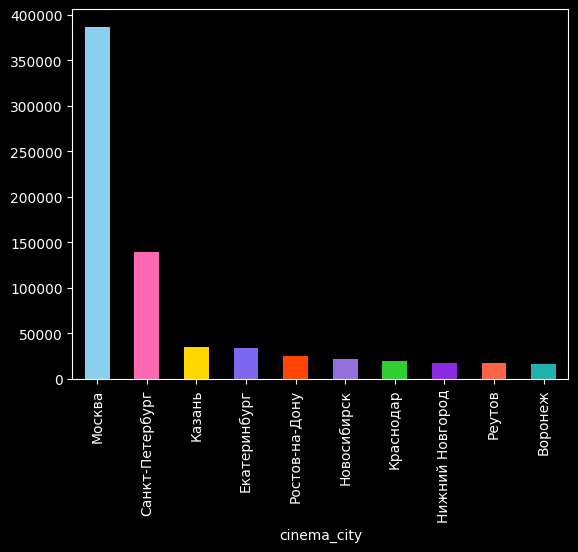

In [ ]:
t.plot(kind='bar', color = colors, rot = 90)

In [ ]:
# каакой максимальной коомпанией люди ходят в кино?
# чаще всего вдыоем, потом по одиночке, заатем 3,4,5,6
# 6 - max
df['number_of_tickets'].value_counts().sort_values(ascending=False)

number_of_tickets
2    341402
1     88899
3     56061
4     28342
5      8855
6      1710
Name: count, dtype: int64

# Рейтинг

In [ ]:
# Разделим рейтинг на категории для удобства
df['movie_rating_q'] = pd.cut(df['movie_rating'],[-float('inf'),0,5,6,7,8,9,10,float('inf')])

In [ ]:
df['movie_rating_q'].value_counts()
# с рейтингом 0.0 большинство фильмов, то есть рейтинг не указан

movie_rating_q
(-inf, 0.0]    284221
(6.0, 7.0]      81604
(7.0, 8.0]      55820
(8.0, 9.0]      47735
(5.0, 6.0]      47486
(0.0, 5.0]       8316
(10.0, inf]        62
(9.0, 10.0]        25
Name: count, dtype: int64

In [ ]:
df[df['movie_name'] == 'Джентльмены'].head(1)


,order_id,creation_date,session_date,movie_id,movie_name,movie_duration,movie_age_restriction,movie_rating,genre_is_triller,genre_is_military,genre_is_action,genre_is_biographical,genre_is_fairy_tale,genre_is_science,genre_is_fantasy,genre_is_historical,genre_is_drama,genre_is_animation,genre_is_cartoon,genre_is_documentary,genre_is_adventure,genre_is_fiction,genre_is_childish,genre_is_horror,genre_is_humor,genre_is_western,genre_is_noir,genre_is_detective,genre_is_biography,genre_is_criminal,genre_is_tragicomedy,genre_is_biopic,genre_is_mystic,genre_is_family,genre_is_comedy,genre_is_arthouse,number_of_tickets,places,sales_in_cu,ticket_price_in_cu,cinema_name,cinema_address,cinema_latitude,cinema_longitude,cinema_city,movie_rating_q
6137,2343947,2020-02-23,2020-02-23,33359,Джентльмены,113,18,8.15,"0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0",2,"ряд 11, место 12, ряд 11, место 13",110.759494,55.379747,Киносфера IMAX,"ул. Правобережная, 1Б",55.880975,37.450368,Москва,"(8.0, 9.0]"


In [ ]:
# ррейтинг для наас не показателесен, у львиной доли фильмов он не указан
df.groupby('movie_rating_q')['sales_in_cu'].sum()

movie_rating_q
(-inf, 0.0]    2.852847e+07
(0.0, 5.0]     7.471707e+05
(5.0, 6.0]     4.533350e+06
(6.0, 7.0]     8.105126e+06
(7.0, 8.0]     5.709608e+06
(8.0, 9.0]     4.929522e+06
(9.0, 10.0]    3.987342e+03
(10.0, inf]    5.487342e+03
Name: sales_in_cu, dtype: float64

In [ ]:
df.shape

(525269, 46)

# Дата

In [ ]:
# извлечем месяц из даты
df['session_date_1'] = df['session_date'].dt.month

In [ ]:
# какоой месяц самый прибыльный?
t = df.groupby('session_date_1')['sales_in_cu'].sum()
t

session_date_1
1     1.510408e+07
2     1.761778e+07
3     6.975749e+06
4     1.186709e+02
5     4.746835e+01
6     5.474684e+03
7     2.944937e+04
8     1.287232e+06
9     7.643009e+06
10    3.866262e+06
11    3.351725e+04
Name: sales_in_cu, dtype: float64

<Axes: xlabel='session_date_1'>

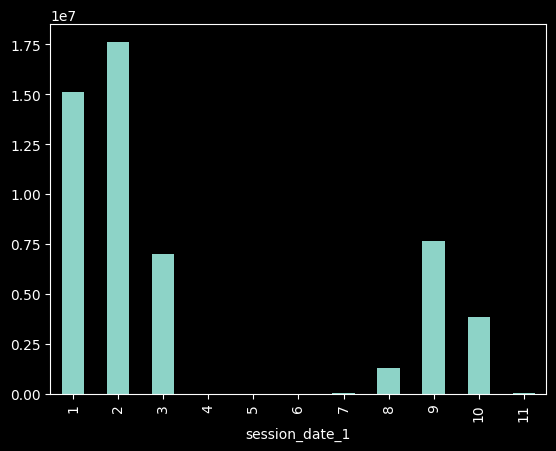

In [ ]:
t.plot(kind='bar')
# по всей стране самым прибыльным является февраль,
# с апреля по июль практически тишина
# на втоороом месте январь, потоом - сентябрь, затем - март
# есть и сюрпризы = значения в ноябре

In [ ]:
# в какой месяц продаано больше всего билетов?
t = df.groupby('session_date_1')['number_of_tickets'].sum()
t

session_date_1
1     317954
2     369675
3     156193
4          4
5          1
6         38
7        541
8      26227
9     149588
10     86890
11       678
Name: number_of_tickets, dtype: int64

<Axes: xlabel='session_date_1'>

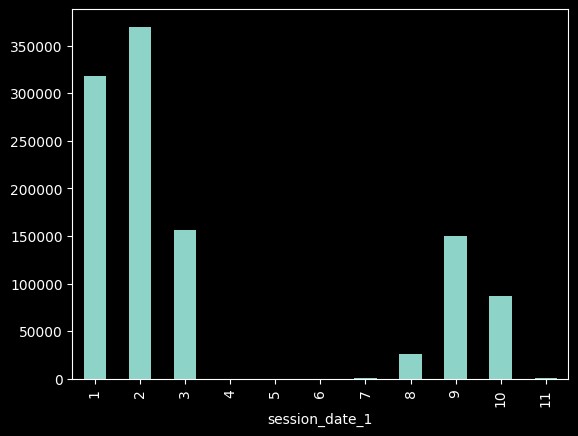

In [ ]:
t.plot(kind='bar')

# Пример визуализации в Tableau

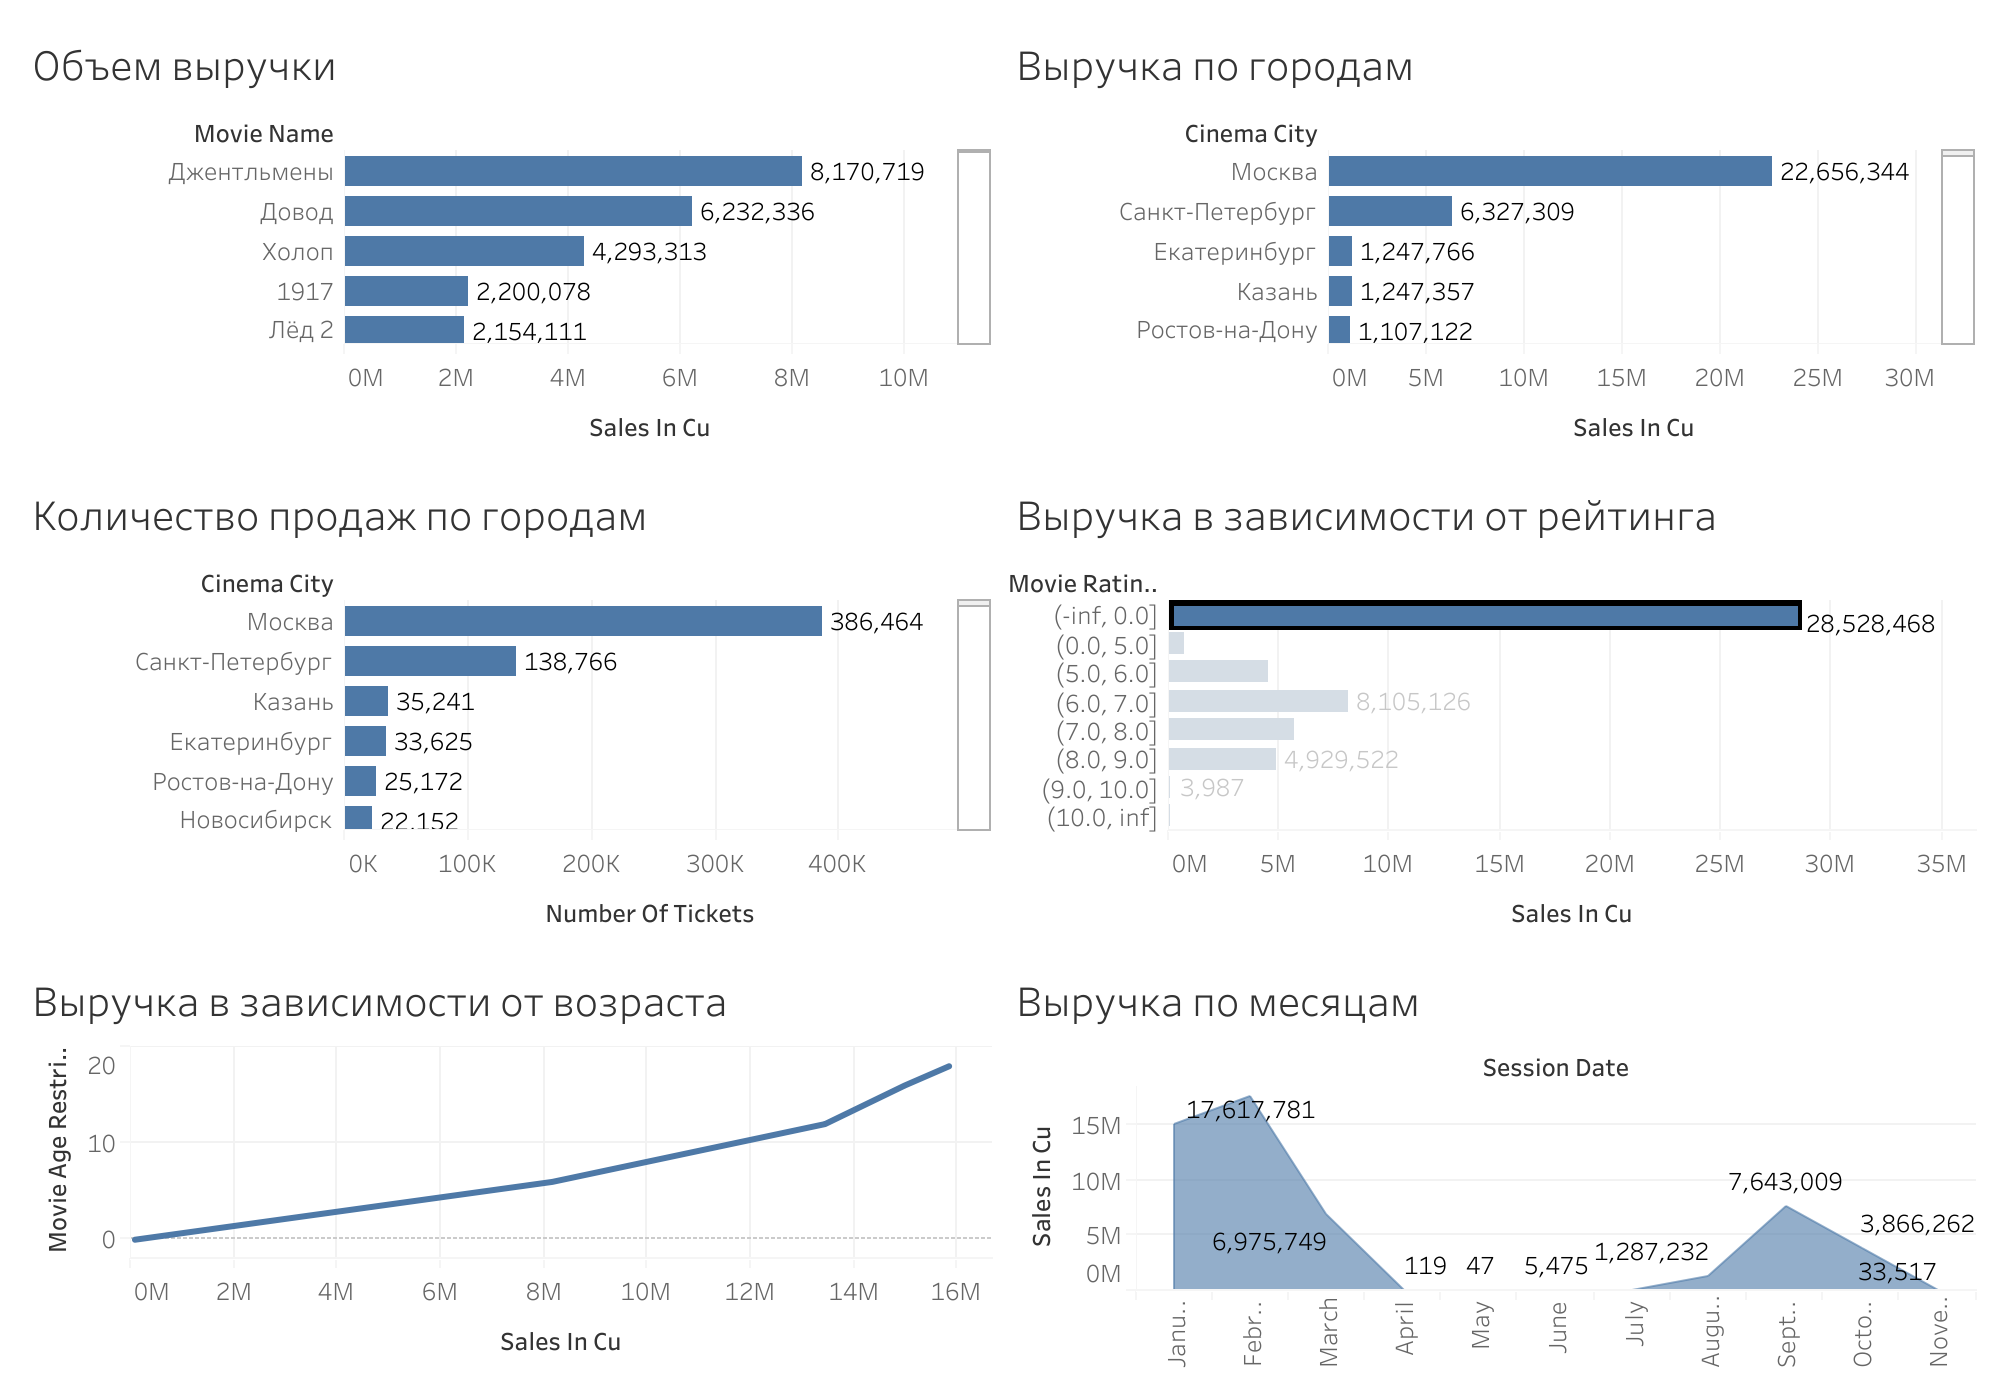

In [ ]:
df.sample(5)

,order_id,creation_date,session_date,movie_id,movie_name,movie_duration,movie_age_restriction,movie_rating,genre_is_triller,genre_is_military,genre_is_action,genre_is_biographical,genre_is_fairy_tale,genre_is_science,genre_is_fantasy,genre_is_historical,genre_is_drama,genre_is_animation,genre_is_cartoon,genre_is_documentary,genre_is_adventure,genre_is_fiction,genre_is_childish,genre_is_horror,genre_is_humor,genre_is_western,genre_is_noir,genre_is_detective,genre_is_biography,genre_is_criminal,genre_is_tragicomedy,genre_is_biopic,genre_is_mystic,genre_is_family,genre_is_comedy,genre_is_arthouse,number_of_tickets,places,sales_in_cu,ticket_price_in_cu,cinema_name,cinema_address,cinema_latitude,cinema_longitude,cinema_city,movie_rating_q,session_date_1
276789,2472687,2020-03-10,2020-03-11,39531,Человек-невидимка,131.,18,0.00,"1,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1,"ряд 3, место 4",47.468354,47.468354,Формула Кино Питерлэнд,"Приморский просп., 72, ТЦ «Питерлэнд»",59.981305,30.209959,Санкт-Петербург,"(-inf, 0.0]",3
43526,2608286,2020-09-15,2020-09-22,38649,Мулан,123,12,0.00,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0",2,"ряд 5, место 4, ряд 5, место 3",72.784810,36.392405,Москино Салют,"Кедрова, 14, корп. 3",55.682829,37.571329,Москва,"(-inf, 0.0]",9
486790,2438180,2020-03-06,2020-03-07,33359,Джентльмены,113,18,8.15,"0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0",2,"ряд 8, место 8, ряд 8, место 9",94.936709,47.468354,Каро 8 Капитолий Вернадского,"просп. Вернадского, д. 6",55.692467,37.527663,Москва,"(8.0, 9.0]",3
7060,2532717,2020-08-16,2020-08-19,48532,Последние и первые люди,70,16,0.00,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1,"ряд 1, место 3",23.734177,23.734177,Москино Звезда,"Земляной Вал, 18/22",55.759791,37.657071,Москва,"(-inf, 0.0]",8
333110,2158584,2020-02-01,2020-02-01,35905,Гретель и Гензель,95.,16,0.00,"1,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",2,"ряд 9, место 10, ряд 9, место 11",110.759494,55.379747,Формула Кино на Можайке,"53-й км МКАД, напротив гипермаркета «Ашан Марф...",55.705804,37.388874,Москва,"(-inf, 0.0]",2
